In [2]:
import os
from utils import print_slide_details

# There are two ways to load the data from the PANDA dataset:
# Option 1: Load images using openslide
import openslide
# Option 2: Load images using skimage (requires that tifffile is installed)
import skimage.io

# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PIL
from IPython.display import Image, display

# Plotly for the interactive viewer (see last section)
import plotly.graph_objs as go

In [3]:
# Location of the training images
data_dir = '/home/johnomena/Documents/TCC/train_images'
mask_dir = '/home/johnomena/Documents/TCC/train_label_masks'

# Location of training labels
train_labels = pd.read_csv('/home/johnomena/Documents/TCC/train.csv').set_index('image_id')

<PIL.Image.Image image mode=RGBA size=256x256 at 0x7BE1CEF7E570>


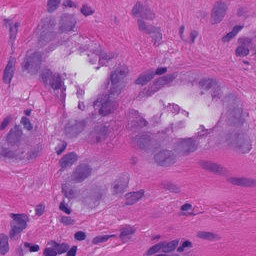

In [11]:
# Open the image (does not yet read the image into memory)
image = openslide.OpenSlide(os.path.join(data_dir, '005e66f06bce9c2e49142536caf2f6ee.tiff'))
# Read a specific region of the image starting at upper left coordinate (x=17800, y=19500) on level 0 and extracting a 256*256 pixel patch.
# At this point image data is read from the file and loaded into memory.
patch = image.read_region((17800,19500), 0, (256, 256))
print(patch)

# Display the image
display(patch)

# Close the opened slide after use
image.close()

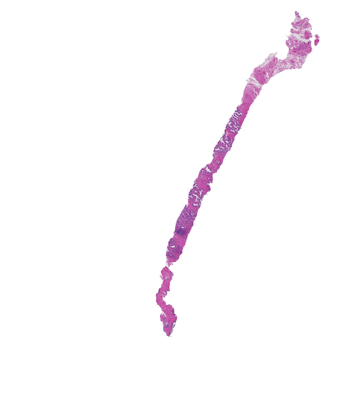

File id: OpenSlide('/home/johnomena/Documents/TCC/train_images/005e66f06bce9c2e49142536caf2f6ee.tiff')
Dimensions: (31744, 37632)
Microns per pixel / pixel spacing: 0.452
Number of levels in the image: 3
Downsample factor per level: (1.0, 4.0, 16.0)
Dimensions of levels: ((31744, 37632), (7936, 9408), (1984, 2352))
ISUP grade: 1
Gleason score: 3+3




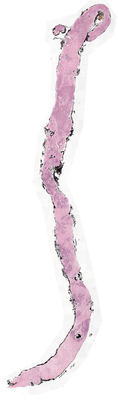

File id: OpenSlide('/home/johnomena/Documents/TCC/train_images/00928370e2dfeb8a507667ef1d4efcbb.tiff')
Dimensions: (10752, 36352)
Microns per pixel / pixel spacing: 0.486
Number of levels in the image: 3
Downsample factor per level: (1.0, 4.0, 16.0)
Dimensions of levels: ((10752, 36352), (2688, 9088), (672, 2272))
ISUP grade: 5
Gleason score: 4+5




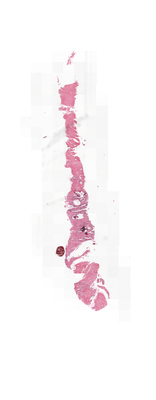

File id: OpenSlide('/home/johnomena/Documents/TCC/train_images/007433133235efc27a39f11df6940829.tiff')
Dimensions: (9472, 24320)
Microns per pixel / pixel spacing: 0.486
Number of levels in the image: 3
Downsample factor per level: (1.0, 4.0, 16.0)
Dimensions of levels: ((9472, 24320), (2368, 6080), (592, 1520))
ISUP grade: 0
Gleason score: negative




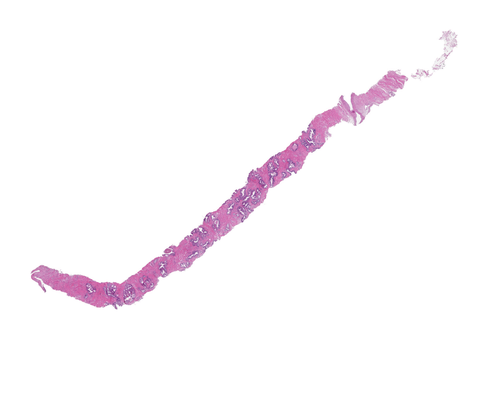

File id: OpenSlide('/home/johnomena/Documents/TCC/train_images/024ed1244a6d817358cedaea3783bbde.tiff')
Dimensions: (26891, 21815)
Microns per pixel / pixel spacing: 0.503
Number of levels in the image: 3
Downsample factor per level: (1.0, 4.000498225811406, 16.005841674527478)
Dimensions of levels: ((26891, 21815), (6722, 5453), (1680, 1363))
ISUP grade: 0
Gleason score: 0+0




In [5]:
example_slides = [
    '005e66f06bce9c2e49142536caf2f6ee',
    '00928370e2dfeb8a507667ef1d4efcbb',
    '007433133235efc27a39f11df6940829',
    '024ed1244a6d817358cedaea3783bbde',
]

for case_id in example_slides:
    biopsy = openslide.OpenSlide(os.path.join(data_dir, f'{case_id}.tiff'))
    print_slide_details(biopsy)
    biopsy.close()
    
    # Print the case-level label
    print(f"ISUP grade: {train_labels.loc[case_id, 'isup_grade']}")
    print(f"Gleason score: {train_labels.loc[case_id, 'gleason_score']}\n\n")